## Model Selection using RFE (SHARED BIKES DEMAND PREDICTION)

### Importing and Understanding Data

In [1]:
# Supress all the Warnings
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import pandas as pd
import numpy as np

In [2]:
# Importing data from day.csv
bikesDemand_df = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows
bikesDemand_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesDemand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
## dropping columns that are irrelevant for the model - 
bikesDemand_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bikesDemand_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
bikesDemand_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
bikesDemand_df.nunique(axis=0)

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [8]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

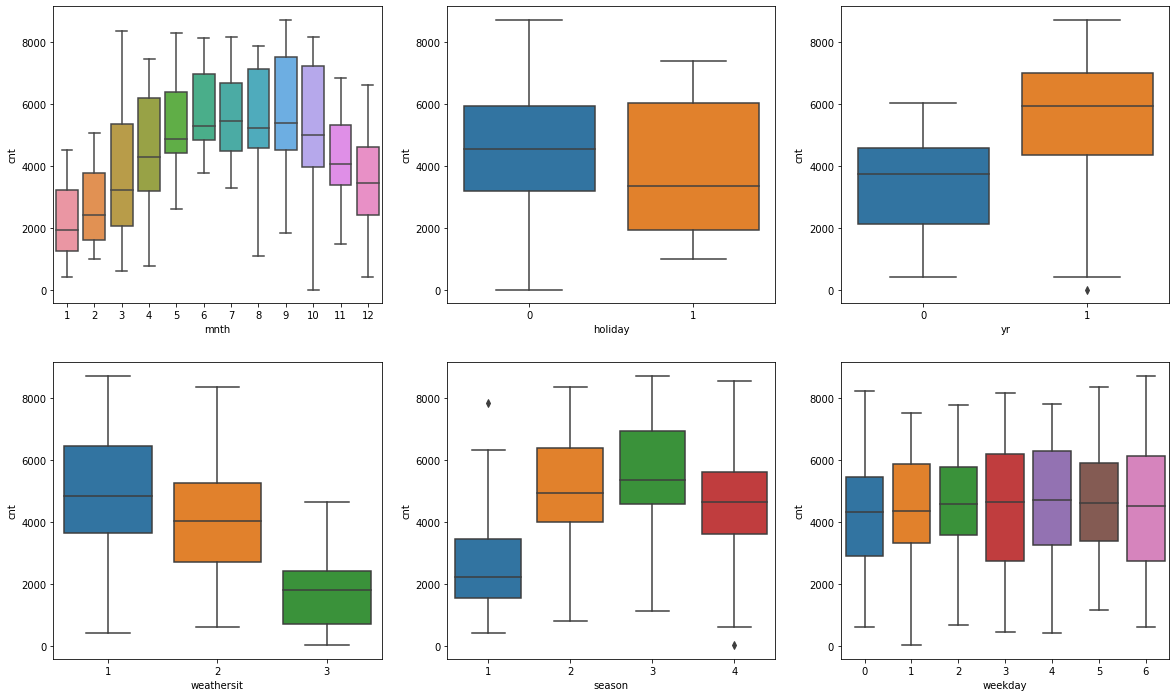

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesDemand_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesDemand_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesDemand_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesDemand_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bikesDemand_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesDemand_df)
plt.show()

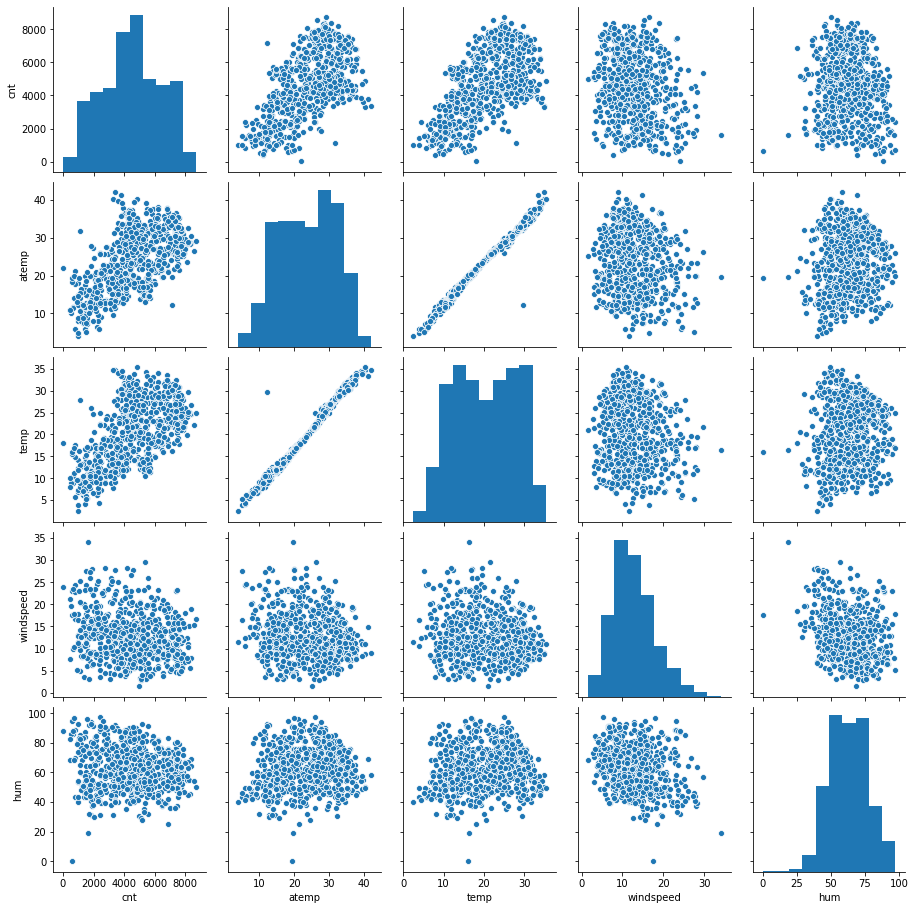

In [10]:
sns.pairplot(data=bikesDemand_df,vars=['cnt', 'atemp', 'temp', 'windspeed','hum'])
plt.show()

### Data Preparation

#### Mapping all the categorical variables with their respective meaning before creating dummy variables out of them


In [11]:
#importing Datetime to process month of the year
import datetime

# Mapping the season column with its respective values
bikesDemand_df['season'] = bikesDemand_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping weathersit column with its respective values
bikesDemand_df['weathersit'] = bikesDemand_df['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 
                                                                 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                                 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                                 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

# Mapping weekday column with its respective values
bikesDemand_df['weekday']=bikesDemand_df['weekday'].astype(str).apply(lambda x:datetime.datetime.strftime(datetime.datetime.strptime(x,"%w"),"%A"))

#Mapping mnth column with its respective values
bikesDemand_df['mnth']=bikesDemand_df['mnth'].astype(str).apply(lambda x:datetime.datetime.strftime(datetime.datetime.strptime(x,"%m"),"%b"))

In [12]:
# Check the bikesDemand dataframe now

bikesDemand_df.head()

#Note: Need not change workingday and year as they already contain only 2 values

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [13]:
#Need to convert all the categorical variables into machine understandable form

# Getting the dummy variables for all the categorical features 
dummy = bikesDemand_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset
bikesDemand_df= pd.concat([dummy,bikesDemand_df],axis = 1)

# Now let's see the head of our dataframe.
bikesDemand_df.head()


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [14]:
## dropping columns for which dummy variables were created
bikesDemand_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bikesDemand_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


## Splitting the Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing data

df_train, df_test = train_test_split(bikesDemand_df, train_size = 0.7, test_size = 0.3, random_state = 100)

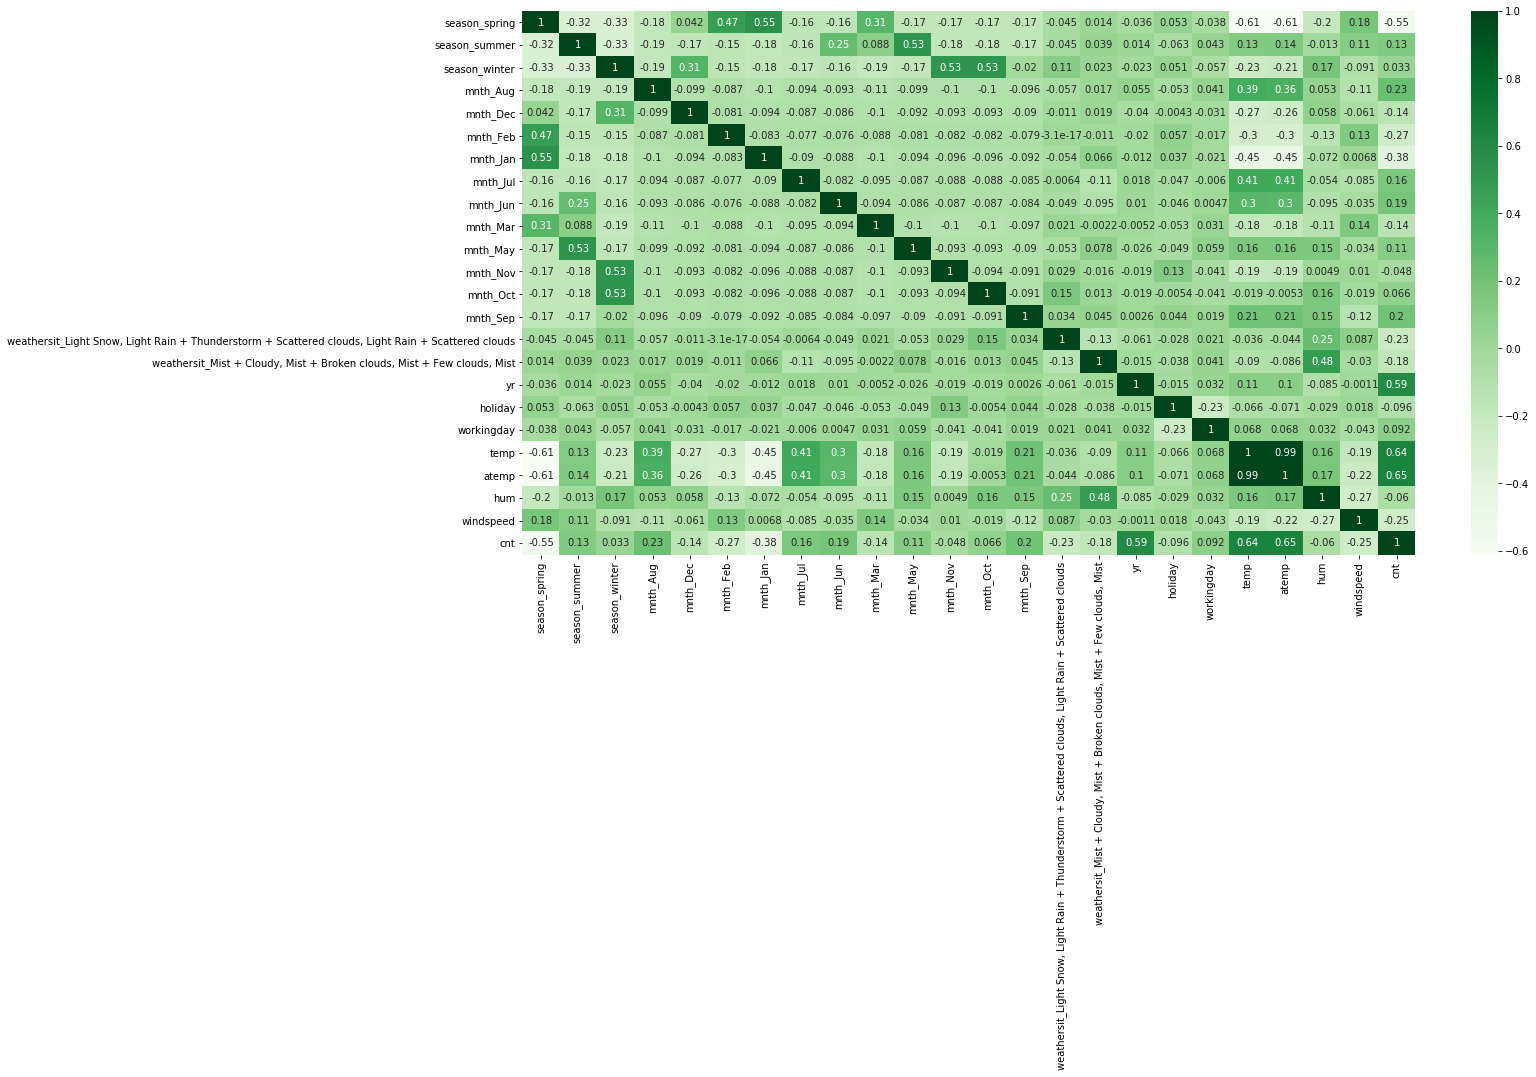

In [16]:
#Visualizing the correlation between the columns in the training set

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

### Rescaling the Features 

MinMax scaling is used.

In [17]:
#importing libraries to scale the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
#Apply scaler to all the columns except the dummy variables
numerical_variables = ['cnt','hum','windspeed','temp','atemp']
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

### Dividing into Training and Testing sets for the model building

In [19]:
#removing the dependent column
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model

The Linear Regression model from the Scikit-Learn library is used to create the model to predict the bikes demand

### RFE
Recursive feature elimination

In [20]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# Running RFE with ouput variables=10 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  False,
  2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [23]:
#picking the columns selected with RFE
columns = X_train.columns[rfe.support_]
print(columns)

Index(['season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')


#### Using statsmodel for the detailed statistics

In [24]:
# Creating X_train_rfe dataframe with selected variables by RFE
X_train_rfe = X_train[columns]

In [25]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [26]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [27]:
#summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.53e-184
Time:                        22:54:04   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3769      0.031     12.133      0.000       0.316       0.438
season_spring                                                                                         -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter                                                                                          0.0653      0.013      5.153      0.000       0.040       0.090
mnth_Jul                                                                                              -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sep                                                                                               0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
yr                                                                                                     0.2281      0.008     27.102      0.000       0.212       0.245
holiday                                                                                               -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                                                                                                   0.5147      0.031     16.542      0.000       0.454       0.576
hum                                                                                                   -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed                                                                                             -0.1887      0.026     -7.194      0.000      -0.240      -0.137
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the columns are significant

In [28]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
8,temp,2.87
1,season_spring,2.53
2,season_winter,1.75
3,mnth_Jul,1.29
9,hum,1.26
10,windspeed,1.15
4,mnth_Sep,1.11
5,"weathersit_Light Snow, Light Rain + Thundersto...",1.11
6,yr,1.03


In [29]:
#Dropping the 'const' column as it is having high VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

## Residual Analysis of the train data

plotting histogram to check if the error terms are normally distributed (Assumptions of linear regression)

In [30]:
#predicting the output count
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

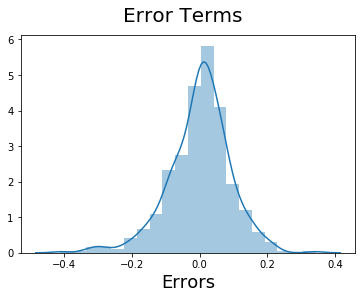

In [31]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

#### Scaling the test sets

In [32]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

#### Dividing into X_test and y_test

In [33]:
y_test = df_test.pop('cnt')
X_test = df_test

In [34]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [35]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

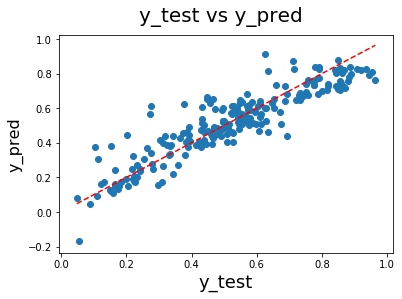

In [36]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [37]:
from sklearn import metrics
mae_value = metrics.mean_absolute_error(y_test, y_pred)
mse_value = metrics.mean_squared_error(y_test, y_pred)
r2_value = metrics.r2_score(y_test, y_pred)
print('MEAN ABSOLUTE ERROR: {}'.format(mae_value))
print('MEAN SQUARED ERROR: {}'.format(mse_value))
print('R2 score: {}'.format(r2_value))

MEAN ABSOLUTE ERROR: 0.069179579262969
MEAN SQUARED ERROR: 0.008656048357387546
R2 score: 0.8177513196533345


In [38]:
model_param = pd.DataFrame(lm.params)
model_param.insert(0,'Variables',model_param.index)
model_param.rename(columns = {0:'Coefficient value'},inplace = True)
model_param['index'] = list(range(0,len(X_test_new.columns)))
model_param.set_index('index',inplace = True)
model_param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
model_param

,Variables,Coefficient value
index,,
8,temp,0.514674
0,const,0.376946
6,yr,0.228051
2,season_winter,0.065282
4,mnth_Sep,0.059762
3,mnth_Jul,-0.080549
7,holiday,-0.092000
1,season_spring,-0.100531
10,windspeed,-0.188675
